In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Exploration and Analysis

In [105]:
df = pd.read_csv('Student_Performance.csv')

In [107]:
print(df.shape)
print(df.head())

(10000, 6)
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [109]:
# check for nulls
print("\n Missing values:\n", df.isnull().sum())


 Missing values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [111]:
# summary of stats
print("\n Summary statistics:\n", df.describe())


 Summary statistics:
        Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.00

# Visualizations

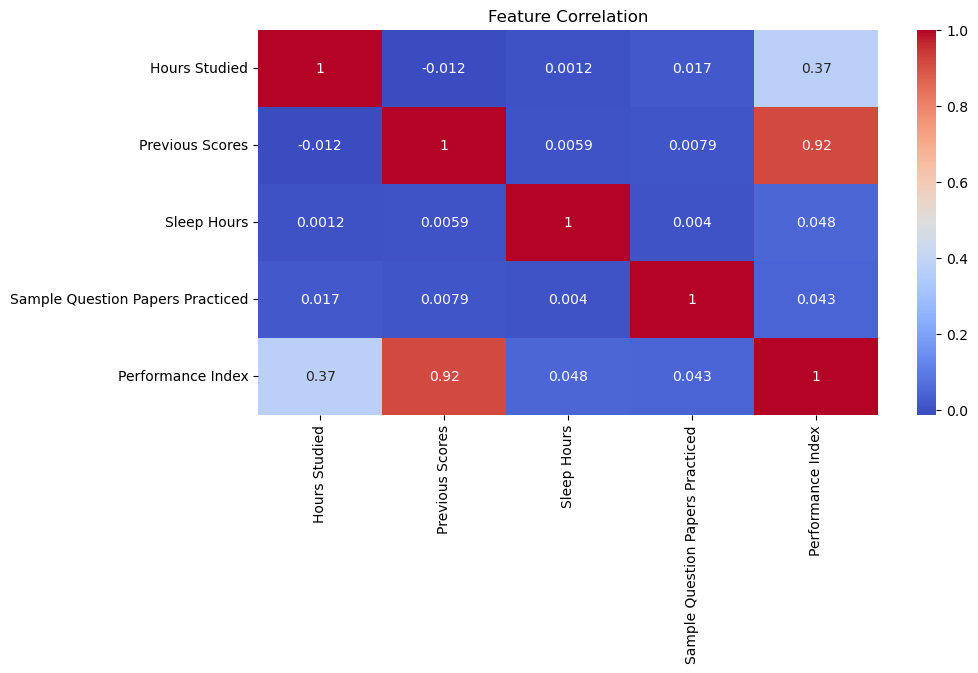

In [114]:
# heat map
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

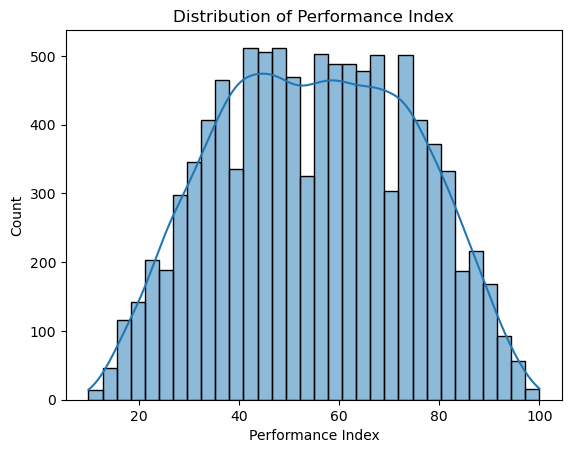

In [116]:
# histogram of target
plt.figure()
sns.histplot(df['Performance Index'], kde=True)
plt.title("Distribution of Performance Index")
plt.show()

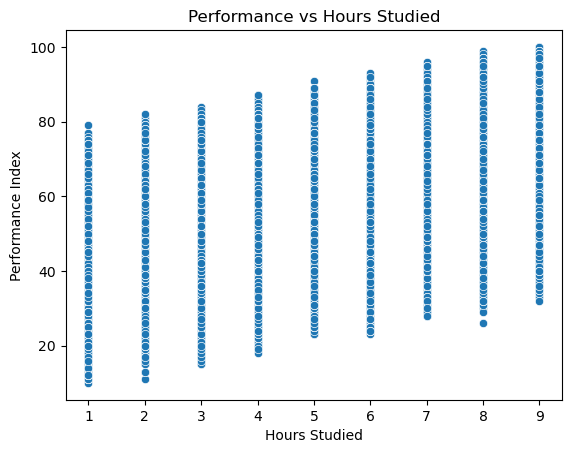

In [118]:
# scatter plot vs hours studied
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df)
plt.title("Performance vs Hours Studied")
plt.show()

# Data Preprocessing

In [121]:
# one-hot encode for 'Extracurricular Activities' feature
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [123]:
# features and target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [125]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Algorithms and Observation and Analysis of Results

In [130]:
# linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [138]:
# k-nearest neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [140]:
# evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R-squared Score:", r2_score(y_true, y_pred))
    
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("KNN Regression", y_test, y_pred_knn)


 Linear Regression Evaluation:
MAE: 1.6111213463123042
MSE: 4.0826283985218526
RMSE: 2.0205515085050054
R-squared Score: 0.9889832909573145

 KNN Regression Evaluation:
MAE: 2.3577
MSE: 8.54194
RMSE: 2.9226597475587197
R-squared Score: 0.9769501266208436


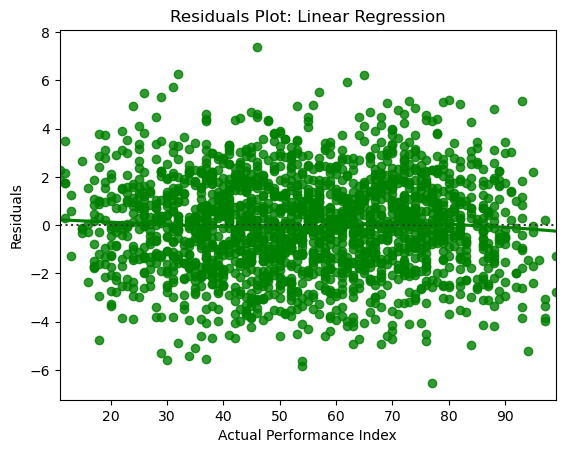

In [142]:
# residual plot
plt.figure()
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='g')
plt.xlabel("Actual Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Linear Regression")
plt.show()